In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook ke andar graphs dikhane ke liye
%matplotlib inline

In [131]:
df = pd.read_csv("../data/cleaned_fraud_data.csv")

# Pehle 5 rows dekhne ke liye
df.head()

,Dummy Policy No,ASSURED_AGE,NOMINEE_RELATION,OCCUPATION,POLICY SUMASSURED,Premium,PREMIUMPAYMENTMODE,Annual Income,HOLDERMARITALSTATUS,INDIV_REQUIREMENTFLAG,...,CORRESPONDENCEPOSTCODE,Product Type,CHANNEL,Bank code,POLICYRISKCOMMENCEMENTDATE,Date of Death,INTIMATIONDATE,STATUS,SUB_STATUS,Fraud Category
0,1,20,Mother,Service,"12,00,000","1,20,000",Quarterly,"4,20,000",Single,Non Medical,...,816115,ULIP,Retail Agency,NaN,30-08-2023,26-10-2023,12-12-2023,Claim,Death Claim Repudiated,Misrepresentation
1,2,33,Husband,Service,"3,50,000","5,000",Yearly,"1,80,000",Married,Non Medical,...,464001,Traditional,Retail Agency,NaN,02-03-2022,31-03-2022,10-02-2023,Claim,Death Claim Repudiated,Misrepresentation
2,3,34,Wife,Self-Employed,"3,50,000","5,000",Yearly,"2,49,000",Married,Non Medical,...,731238,Traditional,Retail Agency,NaN,08-07-2022,11-11-2022,26-06-2023,Claim,Death Claim Repudiated,Misrepresentation
3,4,34,Wife,Service,"3,25,000","5,000",Yearly,"3,60,000",Married,Non Medical,...,281504,Traditional,Retail Agency,NaN,27-12-2022,08-04-2023,14-08-2023,Claim,Death Claim Repudiated,Misrepresentation
4,5,54,Husband,Housewife,"1,00,000","5,000",Yearly,"6,00,000",Married,Non Medical,...,606001,Traditional,Retail Agency,NaN,24-03-2023,11-04-2023,06-12-2023,Claim,Death Claim Repudiated,Misrepresentation


In [132]:
print("Dataset Shape:", df.shape)
print("\nColumn Information:\n")
print(df.info())

Dataset Shape: (1321, 24)

Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321 entries, 0 to 1320
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Dummy Policy No             1321 non-null   int64  
 1   ASSURED_AGE                 1321 non-null   int64  
 2   NOMINEE_RELATION            1321 non-null   object 
 3   OCCUPATION                  1321 non-null   object 
 4   POLICY SUMASSURED           1321 non-null   object 
 5   Premium                     1321 non-null   object 
 6   PREMIUMPAYMENTMODE          1321 non-null   object 
 7   Annual Income               1321 non-null   object 
 8   HOLDERMARITALSTATUS         1321 non-null   object 
 9   INDIV_REQUIREMENTFLAG       1321 non-null   object 
 10  Policy Term                 1321 non-null   int64  
 11  Policy Payment Term         1321 non-null   int64  
 12  CORRESPONDENCECITY          1321 non-null 

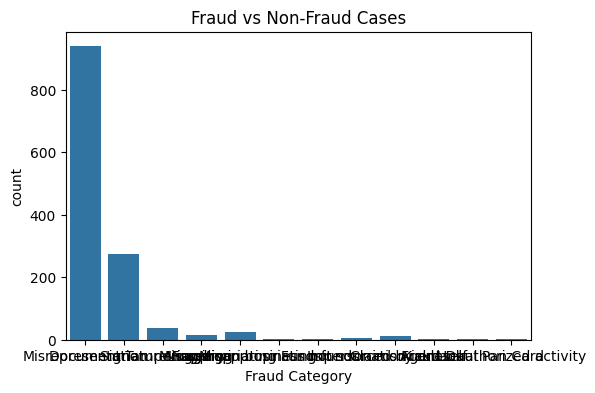

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='Fraud Category', data=df)
plt.title("Fraud vs Non-Fraud Cases")
plt.show()

In [134]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Dummy Policy No                 0
ASSURED_AGE                     0
NOMINEE_RELATION                0
OCCUPATION                      0
POLICY SUMASSURED               0
Premium                         0
PREMIUMPAYMENTMODE              0
Annual Income                   0
HOLDERMARITALSTATUS             0
INDIV_REQUIREMENTFLAG           0
Policy Term                     0
Policy Payment Term             0
CORRESPONDENCECITY              0
CORRESPONDENCESTATE             0
CORRESPONDENCEPOSTCODE          0
Product Type                    0
CHANNEL                         0
Bank code                     463
POLICYRISKCOMMENCEMENTDATE      0
Date of Death                   0
INTIMATIONDATE                  0
STATUS                          0
SUB_STATUS                      0
Fraud Category                  0
dtype: int64


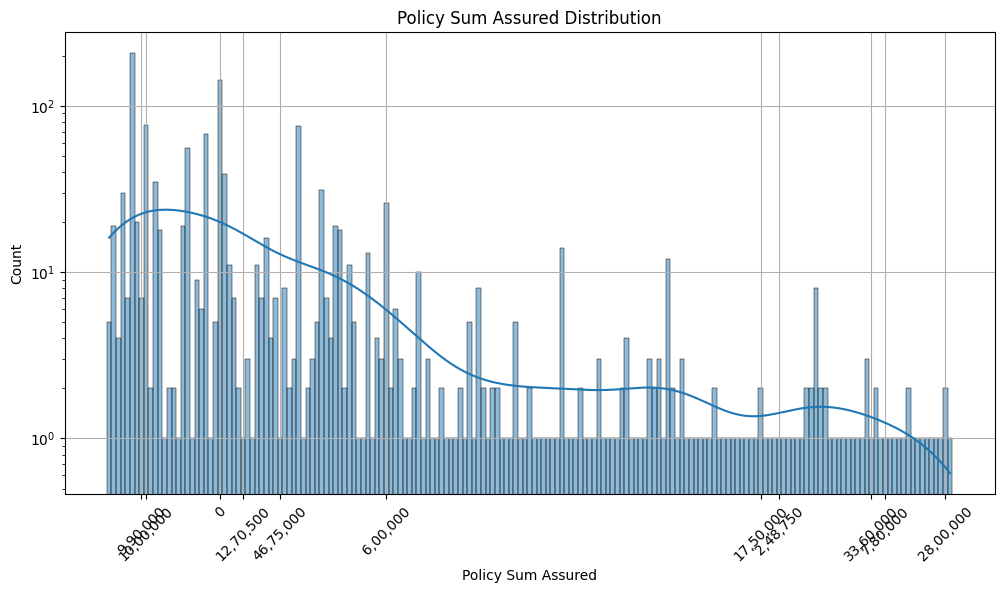

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

# Histogram plot
sns.histplot(df['POLICY SUMASSURED'], bins=20, kde=True)  # Bins reduce karke clarity badhayi

# Log scale on y-axis
plt.yscale("log")

# X-axis labels filter karne ke liye unique values ko sample karenge
unique_values = np.sort(df['POLICY SUMASSURED'].unique())  
sampled_values = unique_values[::len(unique_values) // 10]  # Har 10th value dikhayenge

plt.xticks(sampled_values, rotation=45)  # Rotate aur filter kiye hue labels lagaye
plt.title("Policy Sum Assured Distribution")
plt.xlabel("Policy Sum Assured")
plt.ylabel("Count")
plt.grid(True)

plt.show()

In [136]:
df = pd.get_dummies(df, columns=['NOMINEE_RELATION'], drop_first=True)

In [137]:
print(df.head())  # Dekho naye columns aaye ya nahi
print(df.columns)  # Sare columns list karo

   Dummy Policy No  ASSURED_AGE     OCCUPATION POLICY SUMASSURED   Premium  \
0                1           20        Service         12,00,000  1,20,000   
1                2           33        Service          3,50,000     5,000   
2                3           34  Self-Employed          3,50,000     5,000   
3                4           34        Service          3,25,000     5,000   
4                5           54      Housewife          1,00,000     5,000   

  PREMIUMPAYMENTMODE Annual Income HOLDERMARITALSTATUS INDIV_REQUIREMENTFLAG  \
0          Quarterly      4,20,000              Single           Non Medical   
1             Yearly      1,80,000             Married           Non Medical   
2             Yearly      2,49,000             Married           Non Medical   
3             Yearly      3,60,000             Married           Non Medical   
4             Yearly      6,00,000             Married           Non Medical   

   Policy Term  ...  NOMINEE_RELATION_Grand Daught

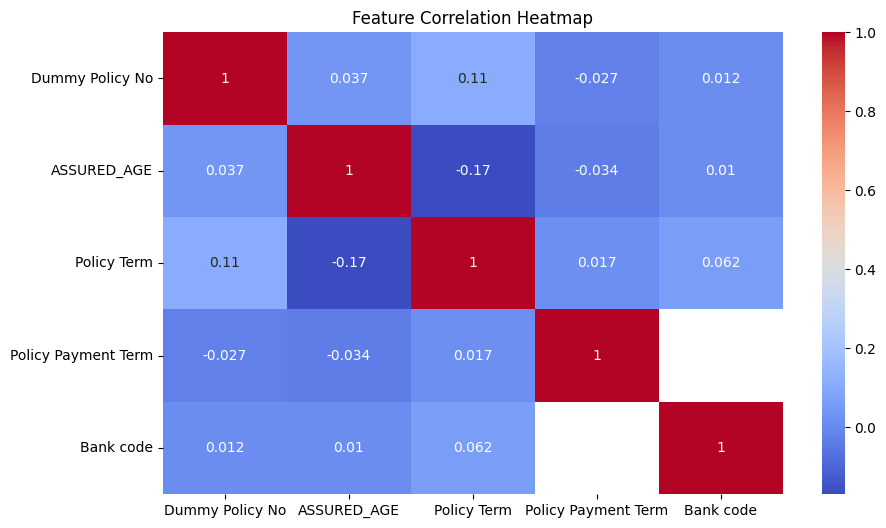

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sirf numeric columns ko select karo
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()